# **This notebook demonstrates the training of a deep neural network, implemented fully from scratch using NumPy, on cat vs not-cat datasets, with comparision.**

In [17]:
import os
path = "/content/drive/MyDrive/Colab Notebooks/Github Repos/deep-nn-from-scratch"
os.chdir(path)
import train
import model
import importlib
importlib.reload(train)
importlib.reload(model)
import matplotlib.pyplot as plt
from model.utils import load_and_prepare_cat_data, plot_costs, load_circle_dataset, plot_decision_boundary, show_image
from model.predict import predict
from train import L_layer_model

In [18]:
config = {
    "layers_dims": [20, 10, 7, 5, 1],
    "layer_inits": {
        1: "he",
        2: "he",
        3: "he",
        4: "he"
    },
    "learning_rate": 0.0075,
    "optimizer": "gd",
    "mini_batch_size": 64,
    "beta": 0.9,
    "beta1": 0.9,
    "beta2": 0.999,
    "epsilon": 1e-8,
    "num_epochs": 1000,
    "keep_probs": {
        1: 1.0,
        2: 1.0,
        3: 1.0,
        4: 1.0
    },
    "lambd": 0.0,
    "decay": True,
    "decay_rate": 0.0,
    "time_interval": 100,
    "print_cost": True
}

## Cat Dataset

In [19]:
train_x, train_y, test_x, test_y, classes = load_and_prepare_cat_data(show_info=True)

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)
train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


y = 1. It's a cat picture.


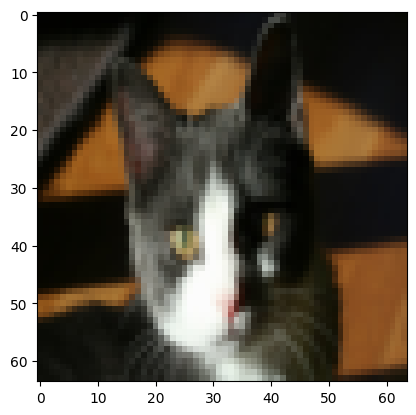

In [20]:
show_image(19, train_x, train_y, classes)

In [21]:
layer_dims_cat = [train_x.shape[0], 20, 7, 5, 1]

## Initialization Methods

In [22]:
init_methods = ['zeros', 'random', 'he', 'xavier', 'glorot']
config_copy = config.copy()
config_copy['layers_dims'] = layer_dims_cat

init_costs = []
for init in init_methods:
    config_copy["layer_inits"] = {1: init, 2: init, 3: init, 4: init}

    _, costs = L_layer_model(train_x, train_y, **config_copy)
    init_costs.append(costs)
    print('-' * 50)

--- Initializing Deep Neural Network Parameters ---
Network Architecture (Layer Sizes): [12288, 20, 7, 5, 1]

--- Layer 1 ---
  Initialization Type: zeros
  W1 shape: (20, 12288)
  b1 shape: (20, 1)
  Parameters in Layer 1: 245780

--- Layer 2 ---
  Initialization Type: zeros
  W2 shape: (7, 20)
  b2 shape: (7, 1)
  Parameters in Layer 2: 147

--- Layer 3 ---
  Initialization Type: zeros
  W3 shape: (5, 7)
  b3 shape: (5, 1)
  Parameters in Layer 3: 40

--- Layer 4 ---
  Initialization Type: zeros
  W4 shape: (1, 5)
  b4 shape: (1, 1)
  Parameters in Layer 4: 6

--- Initialization Summary ---
Total Trainable Parameters in Network: 245,973
Parameters Breakdown by Layer:
  Layer 1: W1 shape: (20, 12288), b1 shape: (20, 1) initialized with zeros
  Layer 2: W2 shape: (7, 20), b2 shape: (7, 1) initialized with zeros
  Layer 3: W3 shape: (5, 7), b3 shape: (5, 1) initialized with zeros
  Layer 4: W4 shape: (1, 5), b4 shape: (1, 1) initialized with zeros
Cost after epoch 0: 0.6928
Updated lear

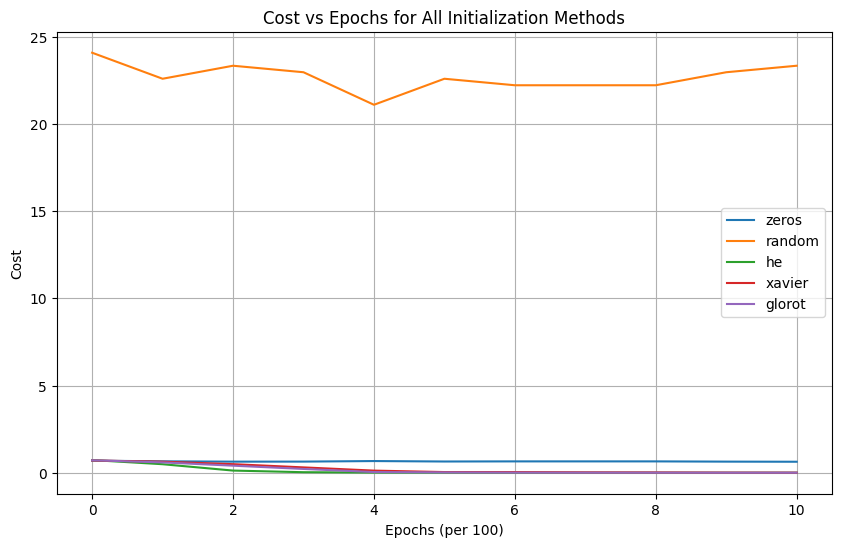

In [23]:
plt.figure(figsize=(10, 6))
for i, costs in enumerate(init_costs):
    plt.plot(costs, label=init_methods[i])

plt.title("Cost vs Epochs for All Initialization Methods")
plt.xlabel("Epochs (per 100)")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.show()

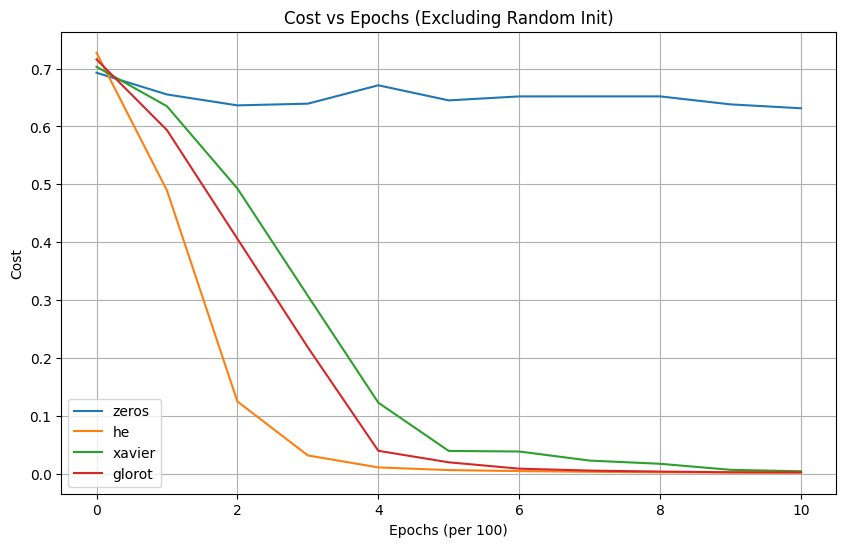

In [25]:
# exclude 'random'
plt.figure(figsize=(10, 6))
for i, costs in enumerate(init_costs):
    if init_methods[i].lower() != 'random':
        plt.plot(costs, label=init_methods[i])

plt.title("Cost vs Epochs (Excluding Random Init)")
plt.xlabel("Epochs (per 100)")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.show()

## Learning Rate

In [27]:
config_copy = config.copy()
config_copy['layers_dims'] = layer_dims_cat
lrs = [0.0001, 0.001, 0.01, 0.1]

lrs_costs = []
for lr in lrs:
    config_copy["learning_rate"] = lr
    _, costs = L_layer_model(train_x, train_y, **config_copy)
    lrs_costs.append(costs)

--- Initializing Deep Neural Network Parameters ---
Network Architecture (Layer Sizes): [12288, 20, 7, 5, 1]

--- Layer 1 ---
  Initialization Type: he
  W1 shape: (20, 12288)
  b1 shape: (20, 1)
  Parameters in Layer 1: 245780

--- Layer 2 ---
  Initialization Type: he
  W2 shape: (7, 20)
  b2 shape: (7, 1)
  Parameters in Layer 2: 147

--- Layer 3 ---
  Initialization Type: he
  W3 shape: (5, 7)
  b3 shape: (5, 1)
  Parameters in Layer 3: 40

--- Layer 4 ---
  Initialization Type: he
  W4 shape: (1, 5)
  b4 shape: (1, 1)
  Parameters in Layer 4: 6

--- Initialization Summary ---
Total Trainable Parameters in Network: 245,973
Parameters Breakdown by Layer:
  Layer 1: W1 shape: (20, 12288), b1 shape: (20, 1) initialized with he
  Layer 2: W2 shape: (7, 20), b2 shape: (7, 1) initialized with he
  Layer 3: W3 shape: (5, 7), b3 shape: (5, 1) initialized with he
  Layer 4: W4 shape: (1, 5), b4 shape: (1, 1) initialized with he
Cost after epoch 0: 0.8239
Updated learning rate after epoch 0:

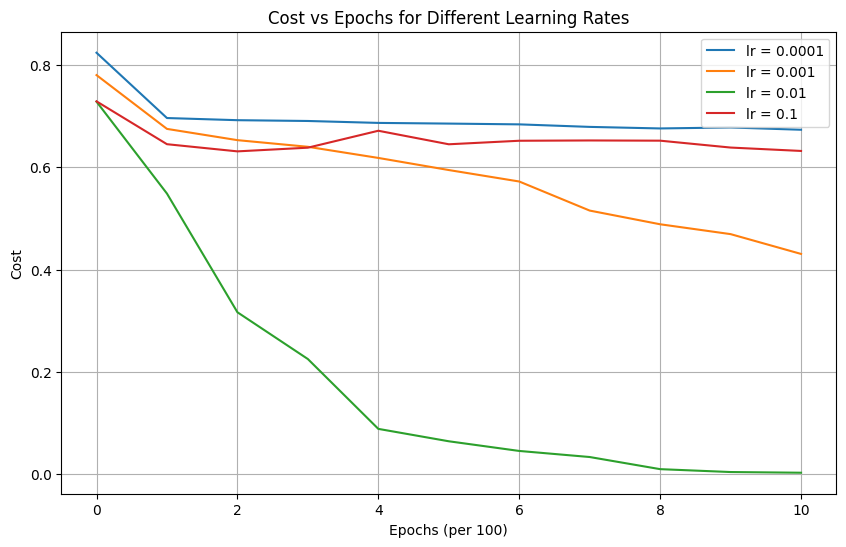

In [28]:
plt.figure(figsize=(10, 6))

for i in range(len(lrs)):
    plt.plot(lrs_costs[i], label=f"lr = {lrs[i]}")

plt.title("Cost vs Epochs for Different Learning Rates")
plt.xlabel("Epochs (per 100)")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.show()

## Optimizers

In [29]:
optimizer_list = ['gd', 'momentum', 'rmsprop', 'adam']
config_copy = config.copy()
config_copy['layers_dims'] = layer_dims_cat
config_copy['mini_batch_size'] = train_x.shape[1]
config_copy['num_epochs'] = 1000
optimizer_costs = []

for optimizer in optimizer_list:
    config_copy["optimizer"] = optimizer
    _, costs = L_layer_model(train_x, train_y, **config_copy)
    optimizer_costs.append(costs)
    print('-' * 50)

--- Initializing Deep Neural Network Parameters ---
Network Architecture (Layer Sizes): [12288, 20, 7, 5, 1]

--- Layer 1 ---
  Initialization Type: he
  W1 shape: (20, 12288)
  b1 shape: (20, 1)
  Parameters in Layer 1: 245780

--- Layer 2 ---
  Initialization Type: he
  W2 shape: (7, 20)
  b2 shape: (7, 1)
  Parameters in Layer 2: 147

--- Layer 3 ---
  Initialization Type: he
  W3 shape: (5, 7)
  b3 shape: (5, 1)
  Parameters in Layer 3: 40

--- Layer 4 ---
  Initialization Type: he
  W4 shape: (1, 5)
  b4 shape: (1, 1)
  Parameters in Layer 4: 6

--- Initialization Summary ---
Total Trainable Parameters in Network: 245,973
Parameters Breakdown by Layer:
  Layer 1: W1 shape: (20, 12288), b1 shape: (20, 1) initialized with he
  Layer 2: W2 shape: (7, 20), b2 shape: (7, 1) initialized with he
  Layer 3: W3 shape: (5, 7), b3 shape: (5, 1) initialized with he
  Layer 4: W4 shape: (1, 5), b4 shape: (1, 1) initialized with he
Cost after epoch 0: 0.8116
Updated learning rate after epoch 0:

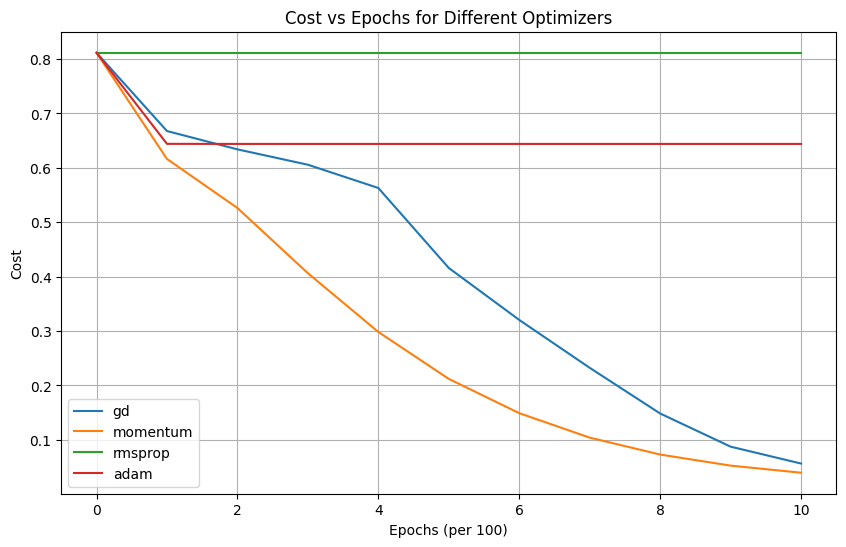

In [30]:
plt.figure(figsize=(10, 6))

for i, costs in enumerate(optimizer_costs):
    plt.plot(costs, label=optimizer_list[i])

plt.title("Cost vs Epochs for Different Optimizers")
plt.xlabel("Epochs (per 100)")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.show()

## Dropout

In [31]:
dropout_configs = [
    {1: 1.0, 2: 1.0, 3: 1.0},
    {1: 0.8, 2: 0.8, 3: 0.8},
    {1: 0.5, 2: 0.5, 3: 0.5}
]

dropout_labels = ['No Dropout', 'Dropout 0.8', 'Dropout 0.5']
dropout_costs = []
config_copy = config.copy()
config_copy['layers_dims'] = [train_x.shape[0], 10, 7, 5, 1]
config_copy["num_epochs"] = 500

for keep_probs in dropout_configs:
    config_copy["keep_probs"] = keep_probs
    _, costs = L_layer_model(train_x, train_y, **config_copy)
    dropout_costs.append(costs)
    print('-' * 50)

--- Initializing Deep Neural Network Parameters ---
Network Architecture (Layer Sizes): [12288, 10, 7, 5, 1]

--- Layer 1 ---
  Initialization Type: he
  W1 shape: (10, 12288)
  b1 shape: (10, 1)
  Parameters in Layer 1: 122890

--- Layer 2 ---
  Initialization Type: he
  W2 shape: (7, 10)
  b2 shape: (7, 1)
  Parameters in Layer 2: 77

--- Layer 3 ---
  Initialization Type: he
  W3 shape: (5, 7)
  b3 shape: (5, 1)
  Parameters in Layer 3: 40

--- Layer 4 ---
  Initialization Type: he
  W4 shape: (1, 5)
  b4 shape: (1, 1)
  Parameters in Layer 4: 6

--- Initialization Summary ---
Total Trainable Parameters in Network: 123,013
Parameters Breakdown by Layer:
  Layer 1: W1 shape: (10, 12288), b1 shape: (10, 1) initialized with he
  Layer 2: W2 shape: (7, 10), b2 shape: (7, 1) initialized with he
  Layer 3: W3 shape: (5, 7), b3 shape: (5, 1) initialized with he
  Layer 4: W4 shape: (1, 5), b4 shape: (1, 1) initialized with he
Cost after epoch 0: 0.7194
Updated learning rate after epoch 0: 

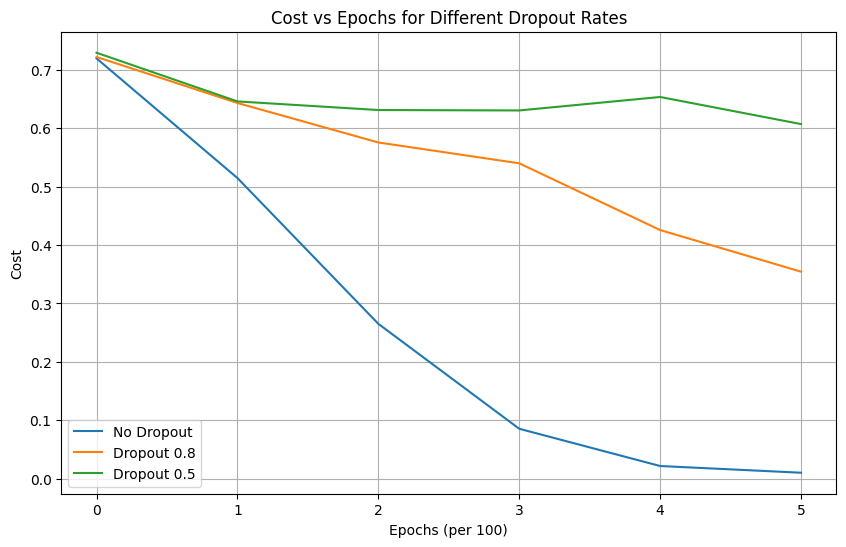

In [32]:
plt.figure(figsize=(10, 6))
for i, costs in enumerate(dropout_costs):
    plt.plot(costs, label=dropout_labels[i])
plt.title("Cost vs Epochs for Different Dropout Rates")
plt.xlabel("Epochs (per 100)")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.show()

## L2 Regularization

In [ ]:
lambdas = [0.0, 0.1, 0.7]
lambda_labels = ['No L2 (λ=0)', 'λ=0.1', 'λ=0.7']
lambda_costs = []
config_copy = config.copy()
config_copy['layers_dims'] = [train_x.shape[0], 10, 7, 5, 1]

for lambd in lambdas:
    config_copy["lambd"] = lambd
    _, costs = L_layer_model(train_x, train_y, **config_copy)
    lambda_costs.append(costs)
    print('-' * 50)

--- Initializing Deep Neural Network Parameters ---
Network Architecture (Layer Sizes): [12288, 10, 7, 5, 1]

--- Layer 1 ---
  Initialization Type: glorot
  W1 shape: (10, 12288)
  b1 shape: (10, 1)
  Parameters in Layer 1: 122890

--- Layer 2 ---
  Initialization Type: glorot
  W2 shape: (7, 10)
  b2 shape: (7, 1)
  Parameters in Layer 2: 77

--- Layer 3 ---
  Initialization Type: glorot
  W3 shape: (5, 7)
  b3 shape: (5, 1)
  Parameters in Layer 3: 40

--- Layer 4 ---
  Initialization Type: glorot
  W4 shape: (1, 5)
  b4 shape: (1, 1)
  Parameters in Layer 4: 6

--- Initialization Summary ---
Total Trainable Parameters in Network: 123,013
Parameters Breakdown by Layer:
  Layer 1: W1 shape: (10, 12288), b1 shape: (10, 1) initialized with glorot
  Layer 2: W2 shape: (7, 10), b2 shape: (7, 1) initialized with glorot
  Layer 3: W3 shape: (5, 7), b3 shape: (5, 1) initialized with glorot
  Layer 4: W4 shape: (1, 5), b4 shape: (1, 1) initialized with glorot
Cost after epoch 0: 0.7084
Updat

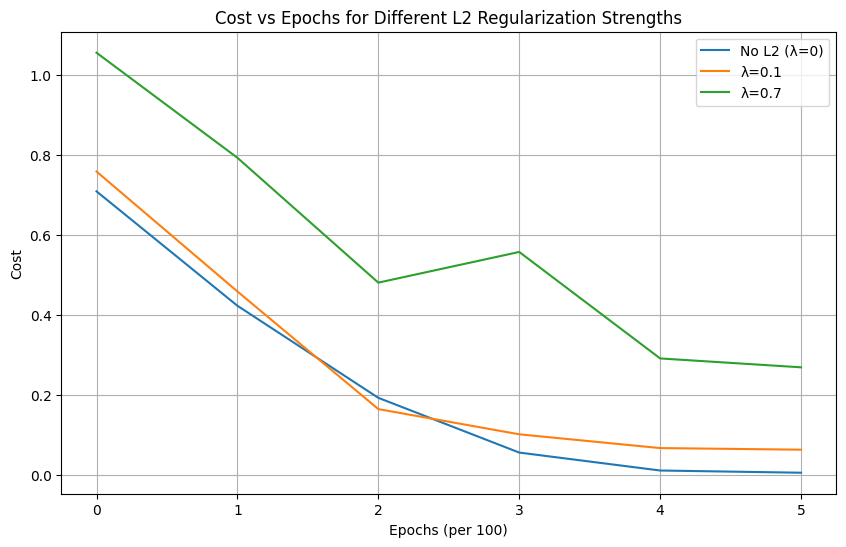

In [ ]:
plt.figure(figsize=(10, 6))
for i, costs in enumerate(lambda_costs):
    plt.plot(costs, label=lambda_labels[i])
plt.title("Cost vs Epochs for Different L2 Regularization Strengths")
plt.xlabel("Epochs (per 100)")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.show()

## Batch and Mini-Batch Gradient Descent

In [ ]:
batch_sizes = [train_x.shape[1], 64, 32]
batch_labels = ['Batch Gradient Descent', 'Mini-Batch (64)', 'Mini-Batch (32)']
batch_costs = []
config_copy = config.copy()
config_copy['layers_dims'] = [train_x.shape[0], 10, 7, 5, 1]

for batch_size in batch_sizes:
    config_copy["mini_batch_size"] = batch_size
    _, costs = L_layer_model(train_x, train_y, **config_copy)
    batch_costs.append(costs)
    print('-' * 50)

--- Initializing Deep Neural Network Parameters ---
Network Architecture (Layer Sizes): [12288, 10, 7, 5, 1]

--- Layer 1 ---
  Initialization Type: glorot
  W1 shape: (10, 12288)
  b1 shape: (10, 1)
  Parameters in Layer 1: 122890

--- Layer 2 ---
  Initialization Type: glorot
  W2 shape: (7, 10)
  b2 shape: (7, 1)
  Parameters in Layer 2: 77

--- Layer 3 ---
  Initialization Type: glorot
  W3 shape: (5, 7)
  b3 shape: (5, 1)
  Parameters in Layer 3: 40

--- Layer 4 ---
  Initialization Type: glorot
  W4 shape: (1, 5)
  b4 shape: (1, 1)
  Parameters in Layer 4: 6

--- Initialization Summary ---
Total Trainable Parameters in Network: 123,013
Parameters Breakdown by Layer:
  Layer 1: W1 shape: (10, 12288), b1 shape: (10, 1) initialized with glorot
  Layer 2: W2 shape: (7, 10), b2 shape: (7, 1) initialized with glorot
  Layer 3: W3 shape: (5, 7), b3 shape: (5, 1) initialized with glorot
  Layer 4: W4 shape: (1, 5), b4 shape: (1, 1) initialized with glorot
Cost after epoch 0: 0.7156
Updat

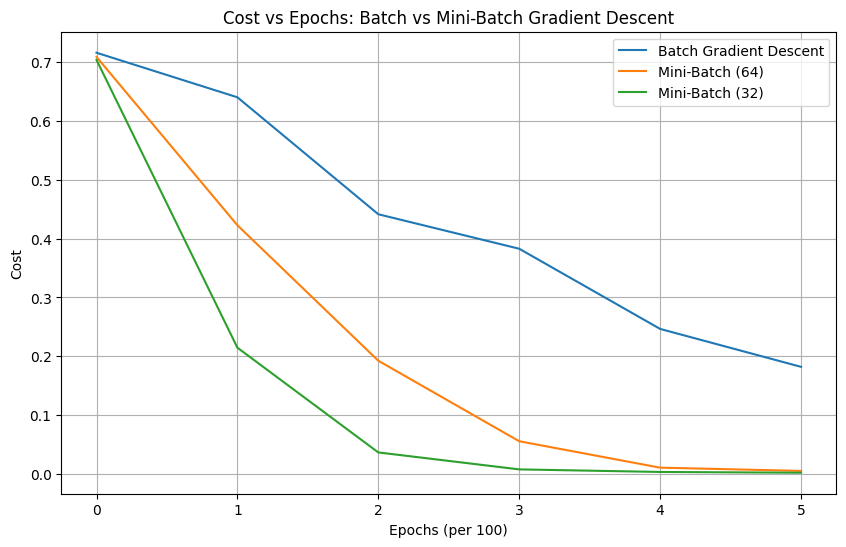

In [ ]:
plt.figure(figsize=(10, 6))
for i, costs in enumerate(batch_costs):
    plt.plot(costs, label=batch_labels[i])
plt.title("Cost vs Epochs: Batch vs Mini-Batch Gradient Descent")
plt.xlabel("Epochs (per 100)")
plt.ylabel("Cost")
plt.legend()
plt.grid(True)
plt.show()

## Prediction

In [ ]:
config_copy = config.copy()
config_copy["layers_dims"] = [train_x.shape[0], 10, 7, 5, 1]
config_copy["mini_batch_size"] = 32
config_copy["num_epochs"] = 1000
parameters, costs = L_layer_model(train_x, train_y, **config_copy)

--- Initializing Deep Neural Network Parameters ---
Network Architecture (Layer Sizes): [12288, 10, 7, 5, 1]

--- Layer 1 ---
  Initialization Type: glorot
  W1 shape: (10, 12288)
  b1 shape: (10, 1)
  Parameters in Layer 1: 122890

--- Layer 2 ---
  Initialization Type: glorot
  W2 shape: (7, 10)
  b2 shape: (7, 1)
  Parameters in Layer 2: 77

--- Layer 3 ---
  Initialization Type: glorot
  W3 shape: (5, 7)
  b3 shape: (5, 1)
  Parameters in Layer 3: 40

--- Layer 4 ---
  Initialization Type: glorot
  W4 shape: (1, 5)
  b4 shape: (1, 1)
  Parameters in Layer 4: 6

--- Initialization Summary ---
Total Trainable Parameters in Network: 123,013
Parameters Breakdown by Layer:
  Layer 1: W1 shape: (10, 12288), b1 shape: (10, 1) initialized with glorot
  Layer 2: W2 shape: (7, 10), b2 shape: (7, 1) initialized with glorot
  Layer 3: W3 shape: (5, 7), b3 shape: (5, 1) initialized with glorot
  Layer 4: W4 shape: (1, 5), b4 shape: (1, 1) initialized with glorot
Cost after epoch 0: 0.7034
Updat

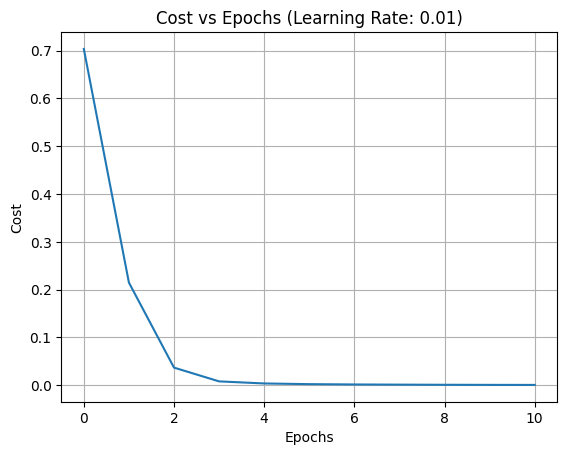

Accuracy: 100.00%


In [ ]:
plot_costs(costs, learning_rate=0.01)
train_pred = predict(train_x, train_y, parameters)

## Moon Dataset

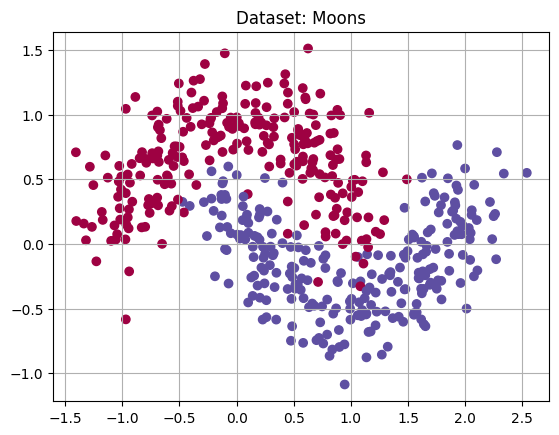

In [33]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, Y = make_moons(n_samples=500, noise=0.2, random_state=3)
Y = Y.reshape(1, -1)
X = X.T

plt.scatter(X[0, :], X[1, :], c=Y.flatten(), cmap=plt.cm.Spectral)
plt.title("Dataset: Moons")
plt.grid(True)
plt.show()

In [43]:
config_copy = config.copy()
config_copy["layers_dims"] = [X.shape[0], 10, 5, 1]
config_copy["num_epochs"] = 5000
# config_copy['decay'] = True
# config_copy['decay_rate'] = 0.005
parameters, costs = L_layer_model(X, Y, **config_copy)

--- Initializing Deep Neural Network Parameters ---
Network Architecture (Layer Sizes): [2, 10, 5, 1]

--- Layer 1 ---
  Initialization Type: he
  W1 shape: (10, 2)
  b1 shape: (10, 1)
  Parameters in Layer 1: 30

--- Layer 2 ---
  Initialization Type: he
  W2 shape: (5, 10)
  b2 shape: (5, 1)
  Parameters in Layer 2: 55

--- Layer 3 ---
  Initialization Type: he
  W3 shape: (1, 5)
  b3 shape: (1, 1)
  Parameters in Layer 3: 6

--- Initialization Summary ---
Total Trainable Parameters in Network: 91
Parameters Breakdown by Layer:
  Layer 1: W1 shape: (10, 2), b1 shape: (10, 1) initialized with he
  Layer 2: W2 shape: (5, 10), b2 shape: (5, 1) initialized with he
  Layer 3: W3 shape: (1, 5), b3 shape: (1, 1) initialized with he
Cost after epoch 0: 0.7383
Updated learning rate after epoch 0: 0.007500
Cost after epoch 100: 0.3544
Updated learning rate after epoch 100: 0.007500
Cost after epoch 200: 0.3134
Updated learning rate after epoch 200: 0.007500
Cost after epoch 300: 0.2924
Updated

Grid shape: (460, 595), Flat shape: (273700, 2)
Prediction shape before reshape: (1, 273700)


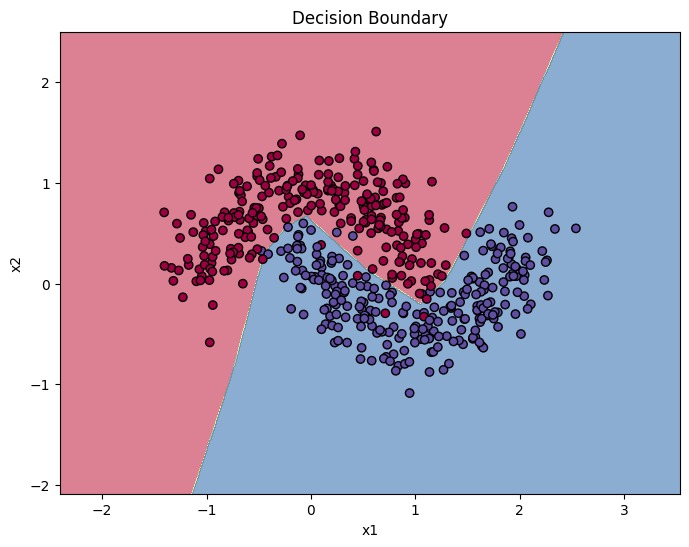

In [44]:
plot_decision_boundary(lambda x: predict(x.T, Y, parameters, verbose=False), X, Y)

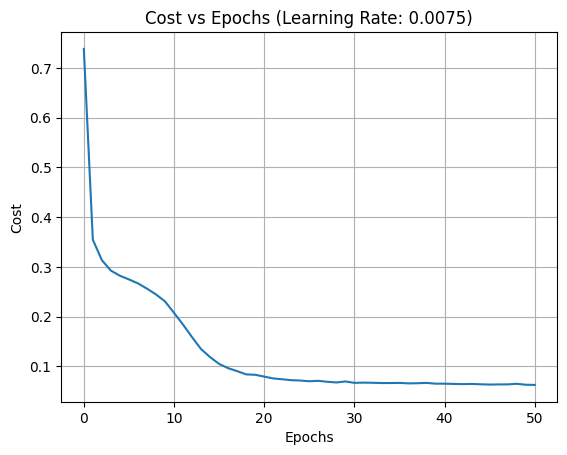

In [45]:
plot_costs(costs, learning_rate=0.0075)